In [1]:
import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt
from rasterio.mask import mask
import numpy as np

In [ ]:
# Load country boundaries (Canada)
gdf = gpd.read_file('data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')
canada_gdf = gdf[gdf['NAME'] == 'Canada']

In [2]:
gdf = gpd.read_file('data\canada_boundaries\lpr_000b16a_e.shp')
quebec_gdf = gdf[gdf['PRENAME'] == 'Quebec']

In [3]:
def plot_raster_data(raster_data, bounds):
    fig, ax = plt.subplots(figsize=(10, 10))
    extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)
    im = ax.imshow(
        raster_data, 
        cmap='viridis', 
        extent=extent,
    )
    ax.set_title('Canada Climate Data')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Add a colorbar to show the temperature gradient
    cbar = plt.colorbar(im, ax=ax, orientation='vertical')
    cbar.set_label('Temperature')

    plt.show()

def open_tif(file_name):
    with rasterio.open(file_name) as src:
        raster_data = src.read(1, masked=True)  # read the first band
        affine = src.transform
        raster_data = np.where(raster_data == raster_data.min(), np.nan, raster_data)
        bounds = src.bounds
    return raster_data, bounds

def visualize_tif(file_name):
    raster_data, bounds = open_tif(file_name)
    plot_raster_data(raster_data, bounds)

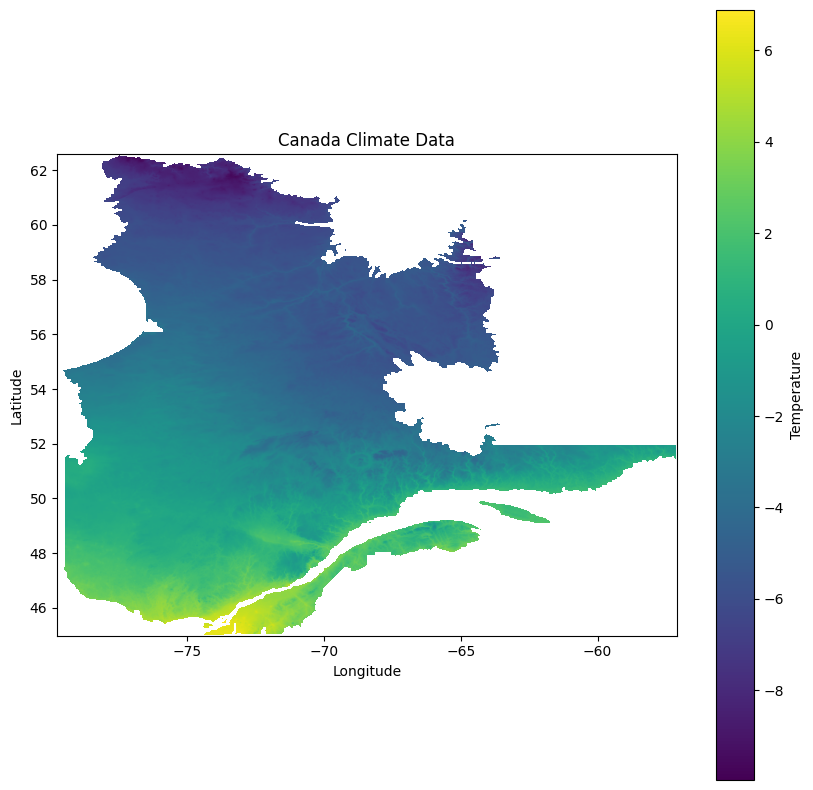

In [4]:
raster_data, bounds = open_tif('data\worldClim\clipped_wc2.1_30s_bio_1.tif')
plot_raster_data(raster_data, bounds)


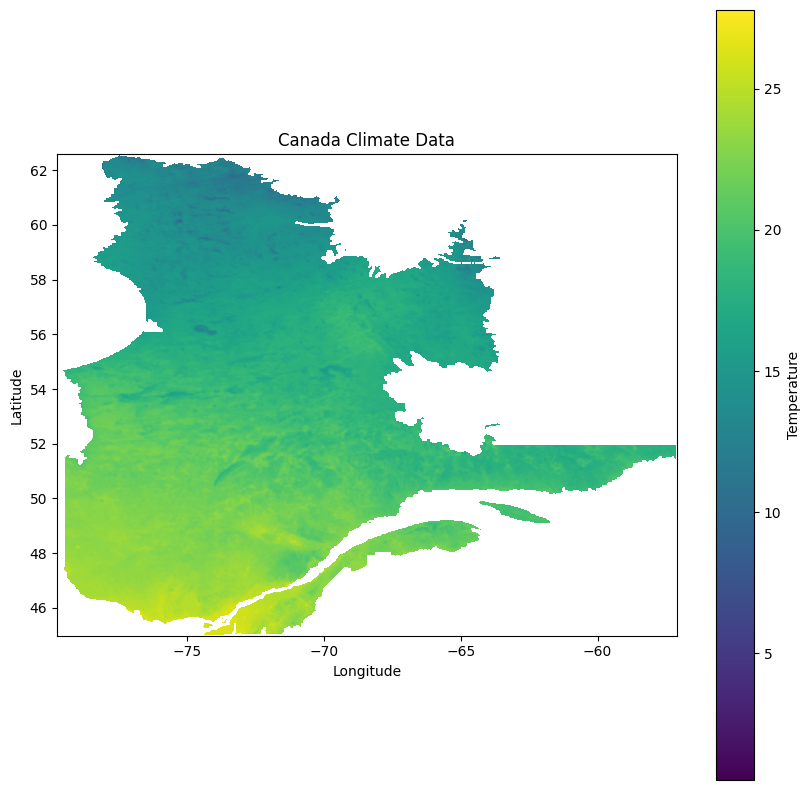

In [16]:
visualize_tif("data\worldClim\clipped_wc2.1_30s_bio_5.tif")

In [8]:
import pandas as pd

import pyarrow.parquet as pq

parquet_file = pq.ParquetFile('data/atlas_public_2024-07-16.parquet')
batches = []
for i, batch in enumerate(parquet_file.iter_batches(batch_size=1000)):
    if i >= 10:
        break
    batches.append(batch.to_pandas())

df = pd.concat(batches, ignore_index=True)
print(df)

         valid_scientific_name  observation_value observation_type  \
0        Myriophyllum spicatum                1.0       occurrence   
1       Impatiens glandulifera                1.0       occurrence   
2     Heracleum mantegazzianum                1.0       occurrence   
3            Popillia japonica              200.0        abundance   
4        Myriophyllum spicatum                1.0       occurrence   
...                        ...                ...              ...   
9995            Morus bassanus                1.0         presence   
9996            Morus bassanus                1.0         presence   
9997            Morus bassanus                1.0         presence   
9998                Uria aalge                1.0         presence   
9999     Oceanodroma leucorhoa                1.0         presence   

      effort_sampling_value effort_sampling_method effort_sampling_unit  \
0                       NaN                   None                 None   
1        

In [12]:
from shapely.geometry import Point

# Create a GeoDataFrame from the DataFrame
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

print(geo_df.head())

      valid_scientific_name  observation_value observation_type  \
0     Myriophyllum spicatum                1.0       occurrence   
1    Impatiens glandulifera                1.0       occurrence   
2  Heracleum mantegazzianum                1.0       occurrence   
3         Popillia japonica              200.0        abundance   
4     Myriophyllum spicatum                1.0       occurrence   

   effort_sampling_value effort_sampling_method effort_sampling_unit  \
0                    NaN                   None                 None   
1                    NaN                   None                 None   
2                    NaN                   None                 None   
3                    NaN                   None                 None   
4                    NaN                   None                 None   

   longitude  latitude coordinate_uncertainty coordinate_uncertainty_unit  \
0   -75.8228   46.4450                   None                        None   
1   -73.54

In [13]:
geo_df

,valid_scientific_name,observation_value,observation_type,effort_sampling_value,effort_sampling_method,effort_sampling_unit,longitude,latitude,coordinate_uncertainty,coordinate_uncertainty_unit,...,genus,dataset_name,dataset_creator,dataset_publisher,license,doi,within_quebec,geom,geom_bbox,geometry
0,Myriophyllum spicatum,1.0,occurrence,NaN,None,None,-75.8228,46.4450,None,None,...,Myriophyllum,Espèces exotiques envahissantes (EEE),Sentinelle/MELCC,Sentinelle/MELCC,CC0 1.0,,True,b'\x01\x01\x00\x00\x00\x86\xc9T\xc1\xa8\xf4R\x...,"{'xmin': -75.82280731201172, 'ymin': 46.444999...",POINT (-75.8228 46.445)
1,Impatiens glandulifera,1.0,occurrence,NaN,None,None,-73.5475,45.9357,None,None,...,Impatiens,Espèces exotiques envahissantes (EEE),Sentinelle/MELCC,Sentinelle/MELCC,CC0 1.0,,True,b'\x01\x01\x00\x00\x00\xd7\xa3p=\ncR\xc0\x00o\...,"{'xmin': -73.54750061035156, 'ymin': 45.935699...",POINT (-73.5475 45.9357)
2,Heracleum mantegazzianum,1.0,occurrence,NaN,None,None,-72.2417,45.2933,None,None,...,Heracleum,Espèces exotiques envahissantes (EEE),Sentinelle/MELCC,Sentinelle/MELCC,CC0 1.0,,True,b'\x01\x01\x00\x00\x00]\xdcF\x03x\x0fR\xc0Z\xf...,"{'xmin': -72.24170684814453, 'ymin': 45.293292...",POINT (-72.2417 45.2933)
3,Popillia japonica,200.0,abundance,NaN,None,None,-71.6025,46.6584,None,None,...,Popillia,Espèces exotiques envahissantes (EEE),Sentinelle/MELCC,Sentinelle/MELCC,CC0 1.0,,True,b'\x01\x01\x00\x00\x00\xc3\xf5(\\\x8f\xe6Q\xc0...,"{'xmin': -71.60250091552734, 'ymin': 46.658393...",POINT (-71.6025 46.6584)
4,Myriophyllum spicatum,1.0,occurrence,NaN,None,None,-76.1305,45.9536,None,None,...,Myriophyllum,Espèces exotiques envahissantes (EEE),Sentinelle/MELCC,Sentinelle/MELCC,CC0 1.0,,True,b'\x01\x01\x00\x00\x001\x08\xac\x1cZ\x08S\xc0\...,"{'xmin': -76.13050079345703, 'ymin': 45.953594...",POINT (-76.1305 45.9536)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Morus bassanus,1.0,presence,NaN,None,None,-62.5500,47.2667,None,None,...,Morus,PIROP Northwest Atlantic 1965-1992 (SEAMAP),OBIS,Biotime,CC-by-NC,https://doi.org/10.1111/geb.12729,True,b'\x01\x01\x00\x00\x00fffffFO\xc0\xee\xeb\xc09...,"{'xmin': -62.55000686645508, 'ymin': 47.266693...",POINT (-62.55 47.2667)
9996,Morus bassanus,1.0,presence,NaN,None,None,-62.7500,47.3500,None,None,...,Morus,PIROP Northwest Atlantic 1965-1992 (SEAMAP),OBIS,Biotime,CC-by-NC,https://doi.org/10.1111/geb.12729,True,b'\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00`O\x...,"{'xmin': -62.75, 'ymin': 47.349998474121094, '...",POINT (-62.75 47.35)
9997,Morus bassanus,1.0,presence,NaN,None,None,-60.7833,47.4333,None,None,...,Morus,PIROP Northwest Atlantic 1965-1992 (SEAMAP),OBIS,Biotime,CC-by-NC,https://doi.org/10.1111/geb.12729,True,"b'\x01\x01\x00\x00\x00xz\xa5,CdN\xc0\xac\xad\x...","{'xmin': -60.78330612182617, 'ymin': 47.433296...",POINT (-60.7833 47.4333)
9998,Uria aalge,1.0,presence,NaN,None,None,-61.3500,47.2667,None,None,...,Uria,PIROP Northwest Atlantic 1965-1992 (SEAMAP),OBIS,Biotime,CC-by-NC,https://doi.org/10.1111/geb.12729,True,b'\x01\x01\x00\x00\x00\xcd\xcc\xcc\xcc\xcc\xac...,"{'xmin': -61.350006103515625, 'ymin': 47.26669...",POINT (-61.35 47.2667)


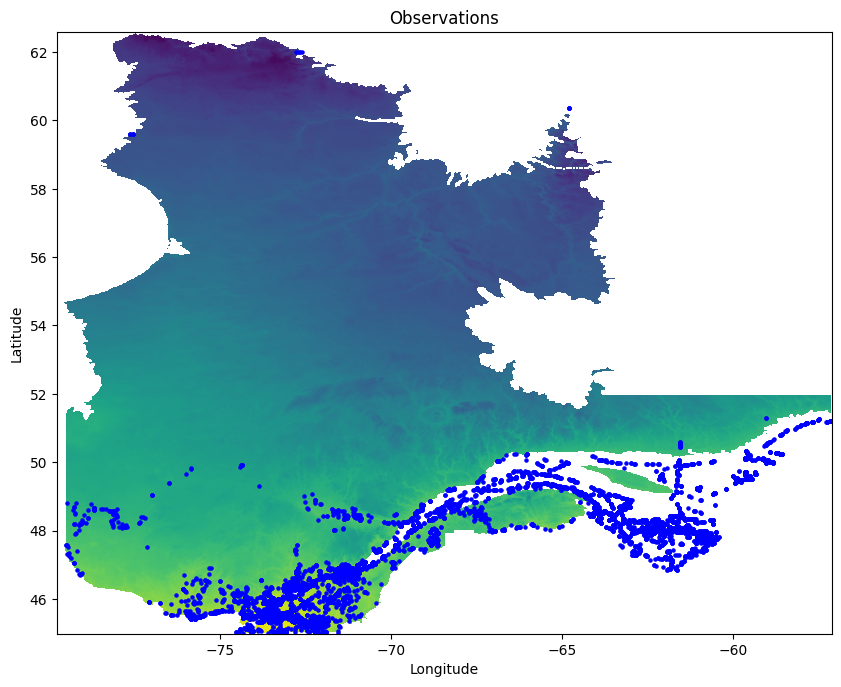

In [6]:
import geopandas as gpd
from shapely.geometry import Point

# Create a GeoDataFrame from the DataFrame
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)
im = ax.imshow(
    raster_data, 
    cmap='viridis', 
    extent=extent,
)
ax.set_title('Canada Climate Data')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# base = world.plot(ax=ax, color='white', edgecolor='black')

geo_df.plot(ax=ax, marker='o', color='blue', markersize=5)
plt.title('Observations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [15]:
from lonboard import viz

# Ensure the CRS is set to WGS84
if geo_df.crs is None:
    geo_df.set_crs(epsg=4326, inplace=True)

viz(geo_df)

Map(basemap_style=<CartoBasemap.DarkMatter: 'https://basemaps.cartocdn.com/gl/dark-matter-gl-style/style.json'…

In [16]:
import h3

In [26]:
H3_res = 5
def geo_to_h3(row):
  return h3.latlng_to_cell(lat=row.latitude,lng=row.longitude, res=H3_res)

In [27]:
geo_df['h3_cell'] = geo_df.apply(geo_to_h3, axis=1)

In [28]:
geo_df['h3_cell']

0       852b800bfffffff
1       852baacbfffffff
2       852ba86bfffffff
3       852bac4bfffffff
4       852b806ffffffff
             ...       
9995    852b0487fffffff
9996    852b048ffffffff
9997    852b2393fffffff
9998    852b23c7fffffff
9999    852b2343fffffff
Name: h3_cell, Length: 10000, dtype: object

In [29]:
geo_df.columns

Index(['valid_scientific_name', 'observation_value', 'observation_type',
       'effort_sampling_value', 'effort_sampling_method',
       'effort_sampling_unit', 'longitude', 'latitude',
       'coordinate_uncertainty', 'coordinate_uncertainty_unit', 'year_obs',
       'month_obs', 'day_obs', 'time_obs', 'vernacular_fr', 'vernacular_en',
       'group_en', 'group_fr', 'observed_rank', 'kingdom', 'phylum', 'class',
       'order', 'family', 'genus', 'dataset_name', 'dataset_creator',
       'dataset_publisher', 'license', 'doi', 'within_quebec', 'geom',
       'geom_bbox', 'geometry', 'h3_cell'],
      dtype='object')

In [ ]:
species_group = geo_df.groupby('h3_cells')